In [1]:
#Description: This program uses the Bollinger Bands amd RSI to determine when to buy and when to sell stock

In [2]:
#import the liberies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [17]:
#Define a function to create and get the Bollinger Bands
def bollinger_bands(data,window_size=30):
    rolling_mean=data['Close'].rolling(window=window_size).mean()#simple Moving Average(SMA30)
    rolling_std=data['Close'].rolling(window=window_size).std()
    data['UpperBand']=rolling_mean+(2*rolling_std)
    data['LowerBand']=rolling_mean-(2*rolling_std)
    return data

In [18]:
#Define a function to create and get the relative strength index(RSI)
def RSI(data,window=13):
    delta =data['Close'].diff()
    gain=delta.where(delta>0,0)
    loss=delta.where(delta<0,0)
    avg_gain=gain.rolling(window).mean()
    avg_loss=loss.rolling(window).mean()
    RS=avg_gain/avg_loss
    RSI=100-(100/(1+RS))
    data['RSI']=RSI
    data['Overbought']=70
    data['Oversold']=30
    return data

In [29]:
#Define a function to create and get the trading strategy
#Buy when the close price goes below the Lower Band and the RSI is less tha 30 and i currently do not have position
#Sell When the Close price goes above the Upper Band and The RSI greater than 60 and i currently have a position
def strategy(data):
    position=0
    buy_price=[]
    sell_price=[]
    
    for i in range(len(data)):
        if data['Close'][i]<data['LowerBand'][i] and data['RSI'][i]<data['Oversold'][i] and position==0:
            position=1
            buy_price.append(data['Close'][i])
            sell_price.append(np.nan)
        elif data['Close'][i]>data['UpperBand'][i] and data['RSI'][i]>data['Overbought'][i] and position==1:
            position=0
            sell_price.append(data['Close'][i])
            buy_price.append(np.nan)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
    return(buy_price,sell_price)

In [42]:
import yfinance as yf
df=yf.download('MMM',start='2017-01-01')
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,178.830002,180.000000,177.220001,178.050003,145.044952,2509300
2017-01-04,178.029999,178.899994,177.610001,178.320007,145.264893,1542000
2017-01-05,178.259995,179.139999,176.889999,177.710007,144.767929,1447800
2017-01-06,177.289993,178.600006,175.800003,178.229996,145.191544,1625000
2017-01-09,178.369995,178.380005,177.199997,177.270004,144.409515,1622600
...,...,...,...,...,...,...
2023-03-09,107.660004,108.559998,105.419998,105.519997,105.519997,3463700
2023-03-10,105.540001,107.000000,103.739998,104.059998,104.059998,3693000
2023-03-13,103.669998,104.680000,102.730003,103.500000,103.500000,4211100


In [43]:
data=bollinger_bands(df)
data

,Open,High,Low,Close,Adj Close,Volume,UpperBand,LowerBand
Date,,,,,,,,
2017-01-03,178.830002,180.000000,177.220001,178.050003,145.044952,2509300,NaN,NaN
2017-01-04,178.029999,178.899994,177.610001,178.320007,145.264893,1542000,NaN,NaN
2017-01-05,178.259995,179.139999,176.889999,177.710007,144.767929,1447800,NaN,NaN
2017-01-06,177.289993,178.600006,175.800003,178.229996,145.191544,1625000,NaN,NaN
2017-01-09,178.369995,178.380005,177.199997,177.270004,144.409515,1622600,NaN,NaN
...,...,...,...,...,...,...,...,...
2023-03-09,107.660004,108.559998,105.419998,105.519997,105.519997,3463700,119.624853,104.829147
2023-03-10,105.540001,107.000000,103.739998,104.059998,104.059998,3693000,119.865082,103.956251
2023-03-13,103.669998,104.680000,102.730003,103.500000,103.500000,4211100,119.936661,103.101339


In [44]:
data=RSI(data)

In [45]:
buy_price,sell_price=strategy(data)
data['Buy']=buy_price
data['Sell']=sell_price

In [46]:
data

,Open,High,Low,Close,Adj Close,Volume,UpperBand,LowerBand,RSI,Overbought,Oversold,Buy,Sell
Date,,,,,,,,,,,,,
2017-01-03,178.830002,180.000000,177.220001,178.050003,145.044952,2509300,NaN,NaN,NaN,70,30,NaN,NaN
2017-01-04,178.029999,178.899994,177.610001,178.320007,145.264893,1542000,NaN,NaN,NaN,70,30,NaN,NaN
2017-01-05,178.259995,179.139999,176.889999,177.710007,144.767929,1447800,NaN,NaN,NaN,70,30,NaN,NaN
2017-01-06,177.289993,178.600006,175.800003,178.229996,145.191544,1625000,NaN,NaN,NaN,70,30,NaN,NaN
2017-01-09,178.369995,178.380005,177.199997,177.270004,144.409515,1622600,NaN,NaN,NaN,70,30,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-09,107.660004,108.559998,105.419998,105.519997,105.519997,3463700,119.624853,104.829147,-58.500697,70,30,NaN,NaN
2023-03-10,105.540001,107.000000,103.739998,104.059998,104.059998,3693000,119.865082,103.956251,-84.200399,70,30,NaN,NaN
2023-03-13,103.669998,104.680000,102.730003,103.500000,103.500000,4211100,119.936661,103.101339,-80.330897,70,30,NaN,NaN


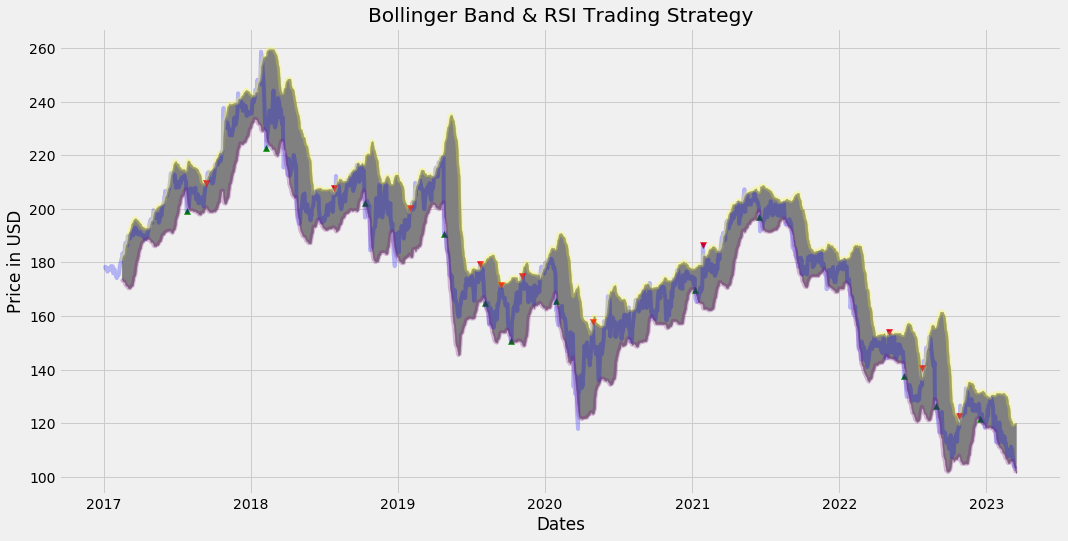

In [47]:
#plot the Close price,Bollinger Bands and the trading signals(Buy and Sell signals)
fig,ax=plt.subplots(figsize=(16,8))
plt.title('Bollinger Band & RSI Trading Strategy')
plt.ylabel('Price in USD')
plt.xlabel('Dates')
ax.plot(data['Close'],label='Close Price',alpha=0.25,color='blue')
ax.plot(data['UpperBand'],label='Upper Band',alpha=0.25,color='yellow')
ax.plot(data['LowerBand'],label='Lower Band',alpha=0.25,color='purple')
ax.fill_between(data.index,data['UpperBand'],data['LowerBand'],color='grey')
ax.scatter(data.index,data['Buy'],label='Buy',alpha=1,marker='^',color='green')
ax.scatter(data.index,data['Sell'],label='Sell',alpha=1,marker='v',color='red')
plt.show()